# Neural Network : Part-1  Building No Hidden Layer Image Classifier 
- 2-class classification neural network without hidden layer 

## Neural Network model

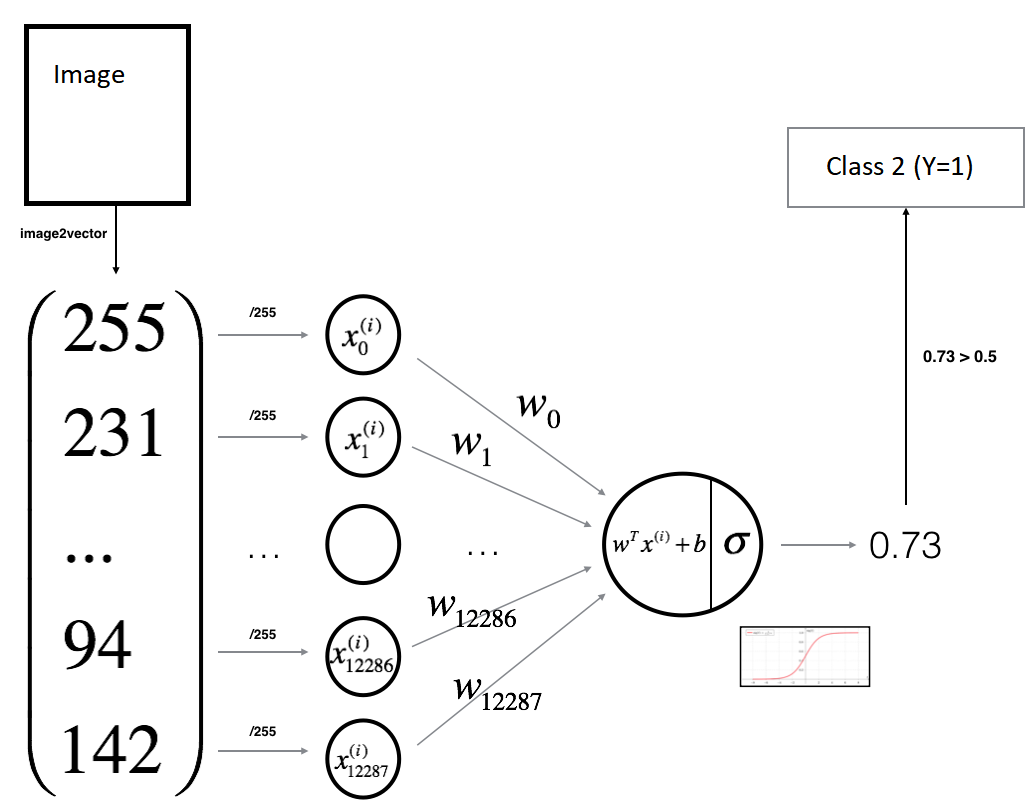

### Defining the neural network structure 
**Mathematically**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import imageio
from datetime import datetime

## Parts of algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

# Building Neural Network Model

In [2]:
def initialize_with_zeros(dim):
    W = np.random.randn(dim, 1) * 0.01
    b = 0.0
    
    
    parameters={"W":W,"b":b}
    
    return parameters

###  Sigmoid function

 $$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$ 

In [3]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

## Propagation

### Forward Propagation

- compute $$A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$$
- calculate the cost function: $$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

In [4]:
def forward_propagate(X,parameters):
    W=parameters["W"]
    b=parameters["b"]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    # compute activation
    A = sigmoid(np.dot(W.T,X) + b) 
    
    return A
    

## Cost/Loss function
 Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (Y\log\left(A\right) + (1-Y)\log\left(1- A\right)) $$

In [5]:
def compute_cost(A, Y):   
    m = Y.shape[1]
    cost = (-1/m) * np.sum( np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T) )
    cost = np.squeeze(cost)
    return cost

### Backward Propagation

- compute$$\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
- compute $$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [6]:
def backward_propagate(A, X, Y):
    m = Y.shape[1]
    db = (1/m) * (np.sum(A-Y))
   
    dW = (1/m)*(np.dot(X,np.subtract(A,Y).T))

    grads = {"dW": dW,
             "db": db}
    
    return grads

### Gradient Descent Updates
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.
The goal is to learn $W$ and $b$ by minimizing the cost function $J$. 
<p>For a parameter $W$ and $b$, the update rule is 
<p>
$$ W = W - \alpha \text{ } dW$$  
$$ b = b - \alpha \text{ } db$$  
<p>where $\alpha$ is the learning rate.

In [7]:
def update_parameters(parameters, grads, learning_rate):
    W=parameters["W"]
    b=parameters["b"]
    W = W - learning_rate * grads["dW"]
    b = b - learning_rate * grads["db"] 
    parameters["W"]=W
    parameters["b"]=b
    return parameters

## Model

In [8]:
def model(X, Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros (≈ 1 line of code)
    parameters = initialize_with_zeros(X.shape[0])
    costs = []
    
    for i in range(num_iterations):
        
        A=forward_propagate(X,parameters)
        
        cost=compute_cost(A, Y)
        
        grads=backward_propagate(A, X, Y)
       
        
        parameters=update_parameters(parameters, grads, learning_rate)
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    parameters["costs"]=costs
    parameters["learning_rate"]=learning_rate
    
    return parameters
    

### Prediction

1. Calculate $$ A = \sigma(w^T X + b)$$


2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector $Y_{prediction}$. 

$$Y_{prediction} =\hat{Y}= \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$$  

In [9]:
def predict(X, myModel):
    m = X.shape[1]
    parameters = dict(myModel)
    del parameters["costs"]
    del parameters["learning_rate"]
   
    yhat = np.zeros((1,m))
        
        
    # Retrieve each parameter from the dictionary "parameters"
    W = parameters["W"]
    b = parameters["b"]
      
    W = W.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(W.T,X) + b)
   
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i] <=0.5):
            yhat[0,i] = 0
        elif (A[0,i] > 0.5):
            yhat[0,i] = 1
        pass
    
    return yhat

# ------------------------------------
# Using Model
# ------------------------------------

## Load Dataset ##

A dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

In [10]:
def load_dataset():
    train_dataset = h5py.File('../Input/Cat_VS_NonCatDS/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../Input/Cat_VS_NonCatDS/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [11]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


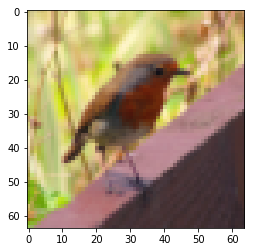

In [12]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + 
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + 
       "' picture.")


<h5>Transform Data</h5>
A trick  to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [13]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


## Standardize our dataset

In [14]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

### Train model

In [15]:
tic = datetime.now()
myModel = model(train_set_x, train_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = True)
toc = datetime.now()
print ("Traning time = " + str((toc - tic).total_seconds()) + " Seconds ")

Cost after iteration 0: 0.679271
Cost after iteration 100: 0.584834
Cost after iteration 200: 0.465328
Cost after iteration 300: 0.374504
Cost after iteration 400: 0.331977
Cost after iteration 500: 0.303768
Cost after iteration 600: 0.280362
Cost after iteration 700: 0.260510
Cost after iteration 800: 0.243392
Cost after iteration 900: 0.228435
Cost after iteration 1000: 0.215227
Cost after iteration 1100: 0.203462
Cost after iteration 1200: 0.192905
Cost after iteration 1300: 0.183370
Cost after iteration 1400: 0.174713
Cost after iteration 1500: 0.166814
Cost after iteration 1600: 0.159577
Cost after iteration 1700: 0.152921
Cost after iteration 1800: 0.146779
Cost after iteration 1900: 0.141092
Cost after iteration 2000: 0.135813
Cost after iteration 2100: 0.130899
Cost after iteration 2200: 0.126315
Cost after iteration 2300: 0.122027
Cost after iteration 2400: 0.118010
Cost after iteration 2500: 0.114238
Cost after iteration 2600: 0.110689
Cost after iteration 2700: 0.107346
Cost

## Plot Learning Curve

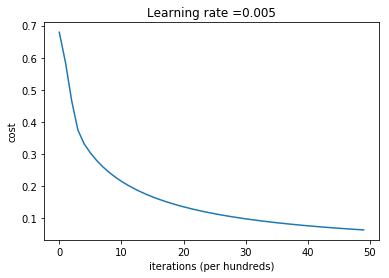

In [16]:
# Plot learning curve (with costs)
costs = np.squeeze(myModel['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(myModel["learning_rate"]))
plt.show()

In [17]:
# Predict test/train set examples (≈ 2 lines of code)
Y_prediction_test = predict(test_set_x, myModel)
Y_prediction_train = predict(train_set_x,  myModel)


# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y)) * 100))

train accuracy: 100.0 %
test accuracy: 70.0 %


## Test Example

y = 0, you predicted that it is a "cat" picture.


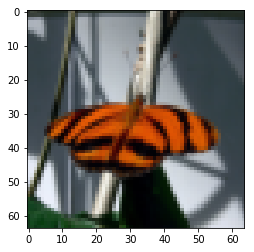

In [18]:
index = 45
predictedClass=int(Y_prediction_test[0,index])
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

print ("y = " + str(test_set_y[0,index]) 
       + ", you predicted that it is a \"" 
       + classes[predictedClass].decode("utf-8") 
       +  "\" picture.")

## Choice of learning rate ##

In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Compare the learning curve of our model with several choices of learning rates. 

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 72.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 89.95215311004785 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 69.377990430622 %
test accuracy: 48.0 %

-------------------------------------------------------



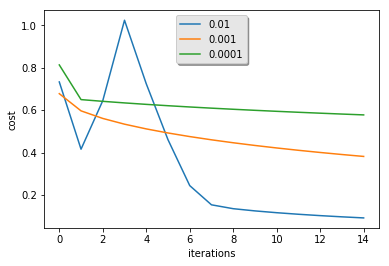

In [19]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(test_set_x,  models[str(i)] )
    Y_prediction_train = predict(train_set_x,   models[str(i)] )

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y)) * 100))
    
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    
    

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Prediction ##


#### Standarize Image Data 

In [21]:
fname = "../Input/Cat_VS_NonCatDS/NonCat_image.jpg" 
image = imageio.imread(fname)
image = scipy.misc.imresize(image, size=(num_px,num_px))
my_image=image.reshape((1, num_px*num_px*3)).T
my_image=my_image/255

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Predict Using Model

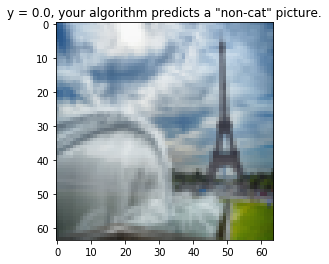

In [22]:
my_predicted_image = predict(my_image,myModel)
plt.title("y = " 
          + str(np.squeeze(my_predicted_image)) 
          + ", your algorithm predicts a \"" 
          + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
plt.imshow(image)
plt.show()